In [31]:
import pystan
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()  # Nice plot aesthetic
np.random.seed(101)

model = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
}
parameters {
    real alpha;
    real beta;
    real<lower=0> sigma;
}
model {
    alpha ~ normal(alpha, 3);
    y ~ normal(alpha + beta * x, sigma);
}
"""

In [32]:
# Parameters to be inferred
alpha = 4.0
beta = 0.5
sigma = 1.0

# Generate and plot data
x = 10 * np.random.rand(100)
y = alpha + beta * x
y = np.random.normal(y, scale=sigma)

/Users/sean/.conda/envs/shenseanchen/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


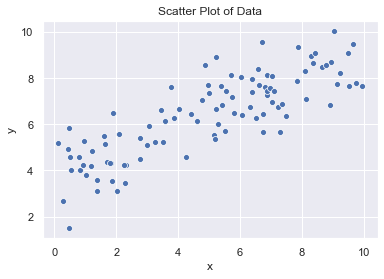

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.scatterplot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Data')
fig.show()

In [34]:
my_data = {'N': len(x), 'x':x, 'y':y}

# compile the model
sm = pystan.StanModel(model_code = model)

# Train the model and generate samples
fit = sm.sampling(data=my_data, iter=1000, chains=4, warmup=500,
                 thin=1, seed=101)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5dac76512503e16d165a1650e73d6591 NOW.


In [35]:
summary_dict = fit.summary()
df = pd.DataFrame(summary_dict['summary'], 
                  columns=summary_dict['summary_colnames'], 
                  index=summary_dict['summary_rownames'])

alpha_mean, beta_mean = df['mean']['alpha'], df['mean']['beta']

# Extracting traces
alpha = fit['alpha']
beta = fit['beta']
sigma = fit['sigma']
lp = fit['lp__']

In [36]:
df

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
alpha,3.847233,0.007791,0.204476,3.432199,3.712045,3.843945,3.988621,4.247307,688.824561,1.003806
beta,0.518992,0.001357,0.035774,0.451554,0.494031,0.519022,0.542252,0.592751,694.847442,1.005137
sigma,1.018336,0.002230,0.072411,0.889964,0.966515,1.015352,1.062878,1.171441,1054.666326,1.003536
lp__,-50.670761,0.046689,1.199146,-53.741125,-51.180655,-50.381009,-49.823333,-49.274058,659.640882,1.009254


In [37]:
def plot_trace(param, param_name='parameter'):
  """Plot the trace and posterior of a parameter."""
  
  # Summary statistics
  mean = np.mean(param)
  median = np.median(param)
  cred_min, cred_max = np.percentile(param, 2.5), np.percentile(param, 97.5)
  
  # Plotting
  plt.subplot(2,1,1)
  plt.plot(param)
  plt.xlabel('samples')
  plt.ylabel(param_name)
  plt.axhline(mean, color='r', lw=2, linestyle='--')
  plt.axhline(median, color='c', lw=2, linestyle='--')
  plt.axhline(cred_min, linestyle=':', color='k', alpha=0.2)
  plt.axhline(cred_max, linestyle=':', color='k', alpha=0.2)
  plt.title('Trace and Posterior Distribution for {}'.format(param_name))

  plt.subplot(2,1,2)
  plt.hist(param, 30, density=True); sns.kdeplot(param, shade=True)
  plt.xlabel(param_name)
  plt.ylabel('density')
  plt.axvline(mean, color='r', lw=2, linestyle='--',label='mean')
  plt.axvline(median, color='c', lw=2, linestyle='--',label='median')
  plt.axvline(cred_min, linestyle=':', color='k', alpha=0.2, label='95% CI')
  plt.axvline(cred_max, linestyle=':', color='k', alpha=0.2)
  
  plt.gcf().tight_layout()
  plt.legend()

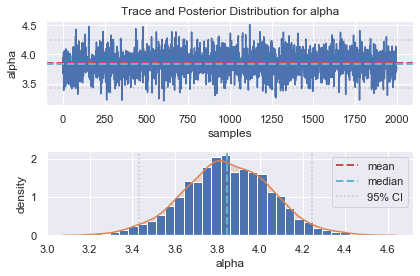

In [38]:
plot_trace(alpha, 'alpha')

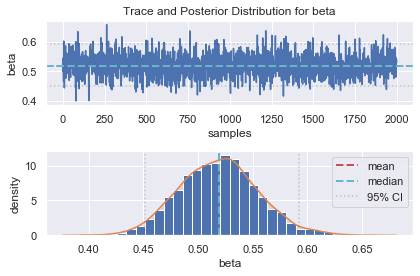

In [39]:
plot_trace(beta, 'beta')

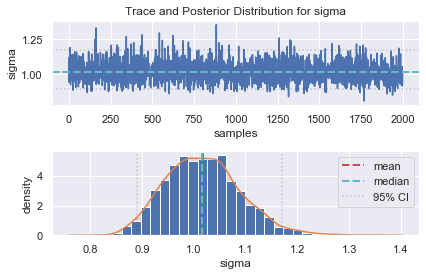

In [40]:
plot_trace(sigma, 'sigma')